In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=45,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',
    validation_split=0.2
)

In [3]:
data_directory = r"C:\Users\admin\Desktop\Projects\CS-Project\Tea-Leaf-Comprehensive-Anaysis\Data\nd-images" 

In [4]:
train_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

Found 1003 images belonging to 3 classes.


In [5]:
# Validation Data Generator
validation_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 249 images belonging to 3 classes.


In [6]:
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [7]:
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

In [10]:
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,433,283 (138.98 MB)

 Trainable params: 12,845,571 (49.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('nitrogen_deficiency_classifier_improved.keras', save_best_only=True)

In [14]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data = validation_generator,
    callbacks= [early_stop, model_checkpoint]
)

Epoch 1/50


c:\Users\admin\Desktop\Projects\CS-Project\Tea-Leaf-Comprehensive-Anaysis\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 268s 8s/step - accuracy: 0.3738 - loss: 0.9917 - val_accuracy: 0.4257 - val_loss: 0.7054
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 246s 7s/step - accuracy: 0.3945 - loss: 0.7062 - val_accuracy: 0.4257 - val_loss: 0.6624
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 228s 7s/step - accuracy: 0.3920 - loss: 0.6628 - val_accuracy: 0.4257 - val_loss: 0.6357
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 243s 7s/step - accuracy: 0.3964 - loss: 0.6526 - val_accuracy: 0.4257 - val_loss: 0.6358
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 256s 8s/step - accuracy: 0.4155 - loss: 0.6501 - val_accuracy: 0.4257 - val_loss: 0.6364
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 239s 7s/step - accuracy: 0.4148 - loss: 0.6590 - val_accuracy: 0.4257 - val_loss: 0.6403
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 229s 7s/step - accuracy: 0.4063 - loss: 0.6611 - val_accuracy: 0.4257 - val_loss: 0.6404
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 248s 7s/step - accuracy: 0.3527 - loss: 0.6588 - val_accuracy: 0.4257 - val_loss: 0.

In [15]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 48s 6s/step - accuracy: 0.4269 - loss: 0.6347
Validation Accuracy: 42.57%


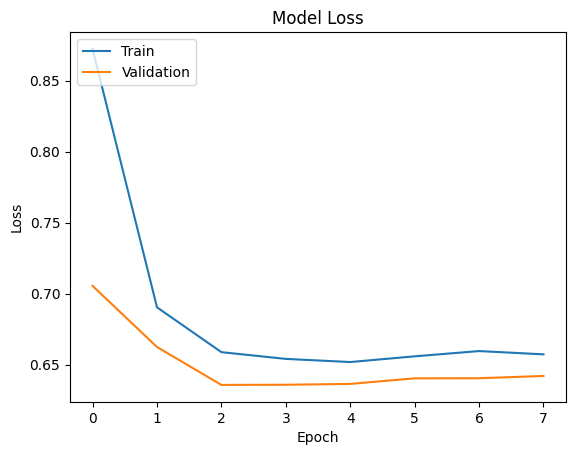

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
model.save('nitrogen_deficiency_classifier.keras')

In [18]:
def predict_deficiency(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  

    prediction = model.predict(img_array)
    categories = ['Healthy', 'Early', 'Advanced']

    predicted_class = np.argmax(prediction[0])
    
    print(f"Predicted Category: {categories[predicted_class]}")


predict_deficiency('Test5.jpg')  

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted Category: Early
